In [1]:
import pandas as pd
import numpy as np


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
from sklearn.impute import SimpleImputer


In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.optimizers import Adam


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [9]:
df=pd.read_csv(r'C:\Users\ADMIN\Downloads\dataset\netflix_titles.csv')

In [10]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
# Display basic information about the dataset
print(df.info())
print( df.shape)
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
(8807, 12)
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien 

# Univariate Analysis


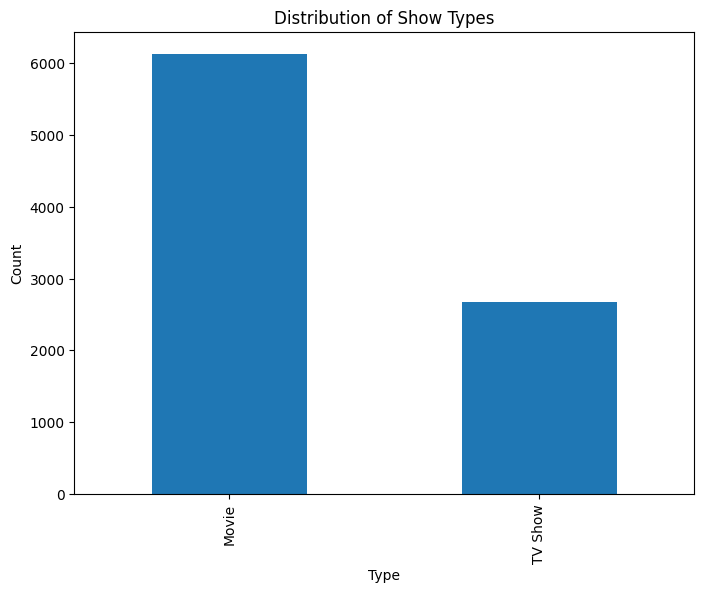

In [14]:
# 1. Distribution of show types
plt.figure(figsize=(8, 6))
df['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Show Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

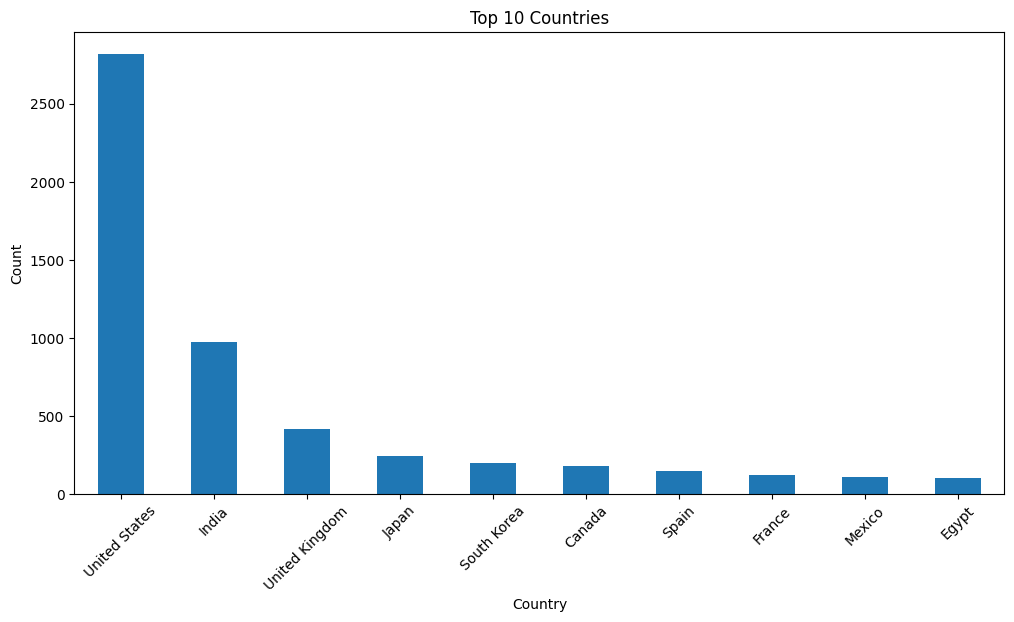

In [15]:
# 2. Top 10 countries
plt.figure(figsize=(12, 6))
df['country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

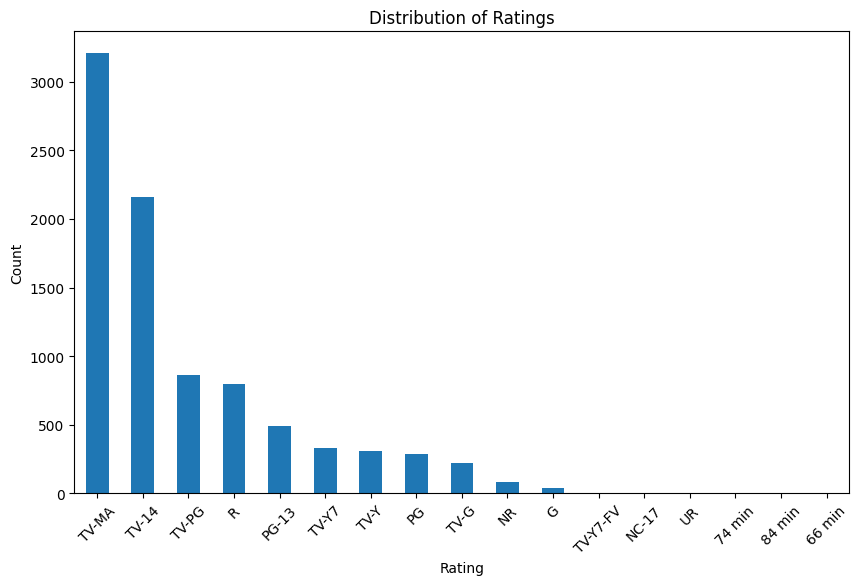

In [16]:
# 3. Distribution of ratings
plt.figure(figsize=(10, 6))
df['rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

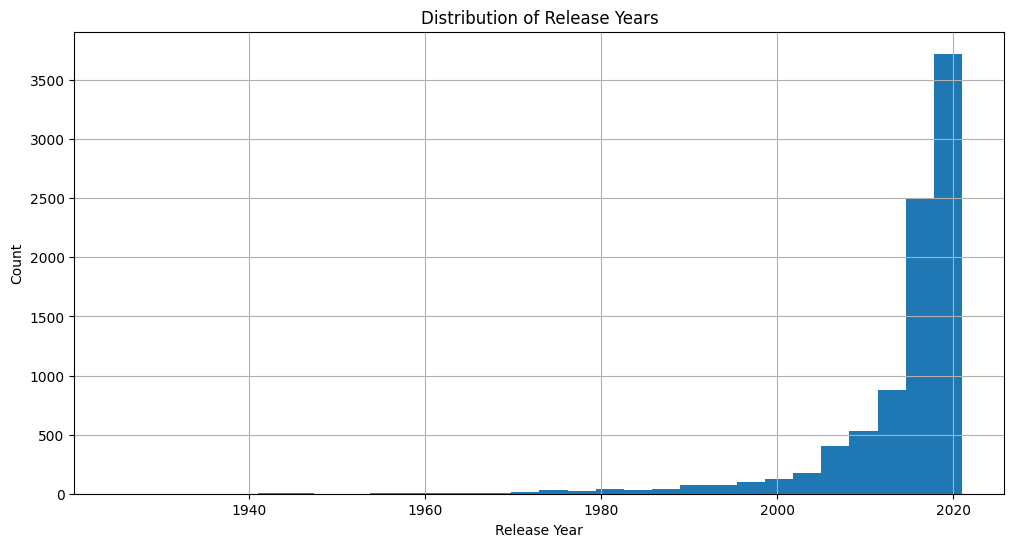

In [17]:
# 4. Release year distribution
plt.figure(figsize=(12, 6))
df['release_year'].hist(bins=30)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

SUMMARY OF UNIVARRIIATE ANALYSIS:
- The dataset contains both movies and TV shows, with movies being slightly more prevalent.
 - The United States is the top country for content production, followed by India and the UK.
 - 'TV-MA' and 'TV-14' are the most common ratings, indicating a focus on mature content.
 - There's a surge in content from recent years, showing Netflix's increased production over time.


# Bivariate Analysis


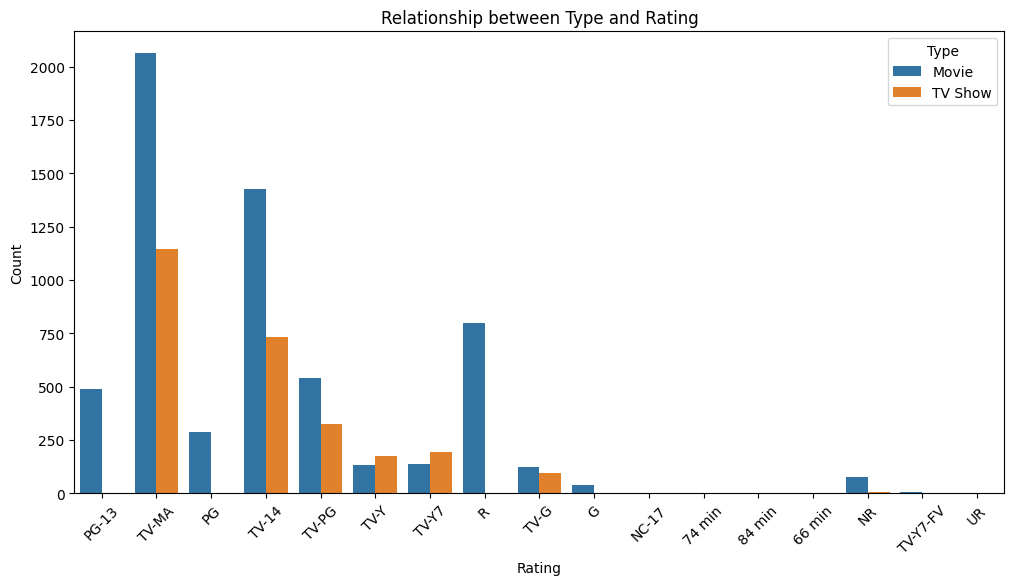

In [18]:
# 1. Relationship between type and rating
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', hue='type', data=df)
plt.title('Relationship between Type and Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1096\1774025975.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)


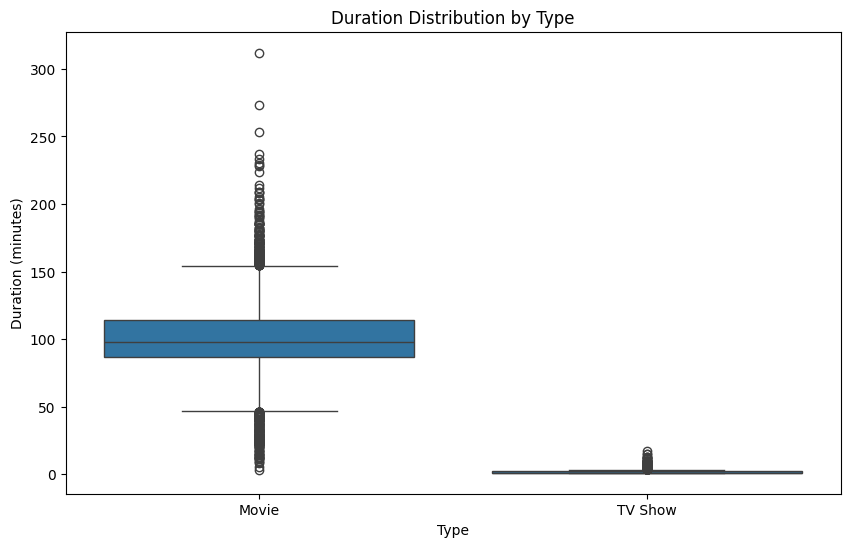

In [19]:
# 2. Average duration by type
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='duration_numeric', data=df)
plt.title('Duration Distribution by Type')
plt.xlabel('Type')
plt.ylabel('Duration (minutes)')
plt.show()


SUMMARY FOR BIVARRIATE ANALYSIS:
-TV shows tend to have more varied ratings compared to movies.
- Movies generally have shorter durations than TV shows, as expected.


# Multivariate Analysis


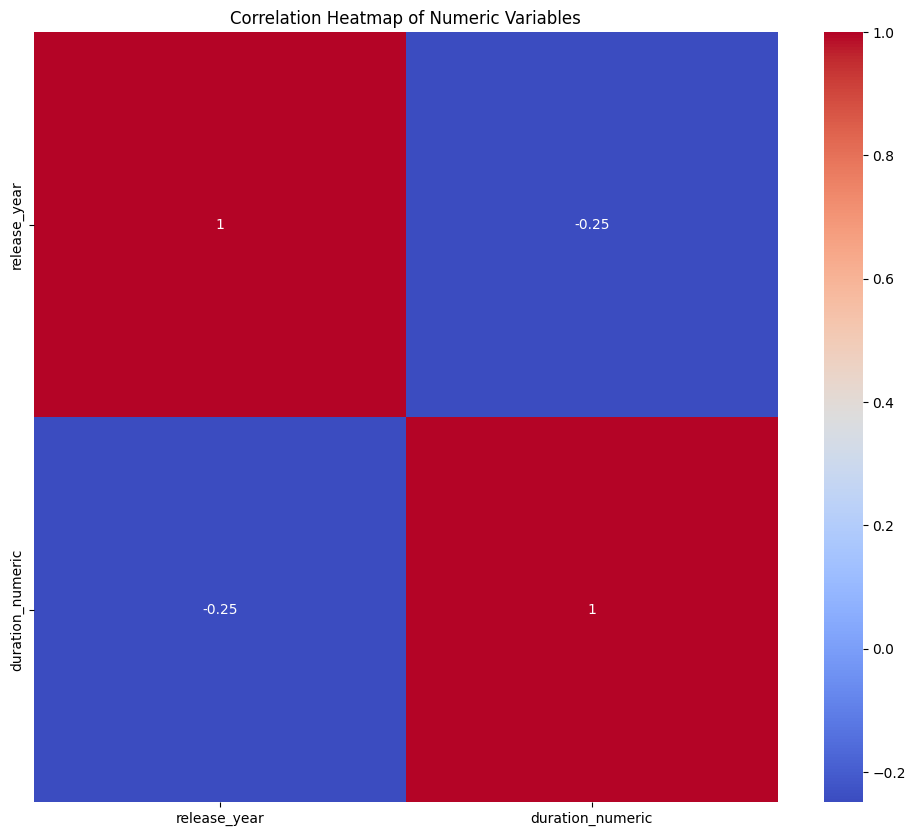

In [20]:
# 1. Heatmap of correlations between numeric variables
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


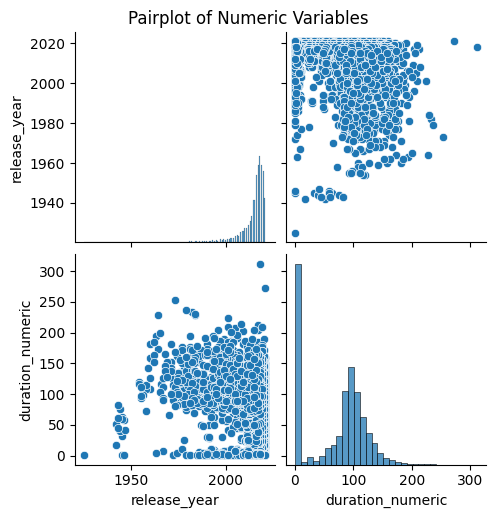

In [21]:
# 2. Pairplot of numeric variables
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()


In [22]:
# Check for multi-collinearity
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

ANALYSIS FOR MULTIVARRIATE ANALYSIS:
- There doesn't seem to be strong correlations between numeric variables, which is expected given the nature of the data.
- The pairplot shows some interesting patterns, such as a potential relationship between release year and other variables.


DATA PREPROCESSING:

In [23]:
# Data type conversion
def clean_date(date_str):
    if pd.isna(date_str):
        return np.nan
    date_str = str(date_str).strip()
    try:
        return pd.to_datetime(date_str, format='mixed')
    except:
        return np.nan

there are inconsistencies in the date format in the'date_added' column. I will handle this by using a more flexible approach to parse the dates. 

In [24]:
# Apply the clean_date function and show some debug information
print("Sample of original date_added values:")
print(df['date_added'].head())

df['date_added'] = df['date_added'].apply(clean_date)

print("\nSample of converted date_added values:")
print(df['date_added'].head())

print("\nNumber of null values in date_added:", df['date_added'].isnull().sum())


Sample of original date_added values:
0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

Sample of converted date_added values:
0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

Number of null values in date_added: 10


In [25]:
# Convert release_year to numeric, coercing errors to NaN
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')


In [26]:
# Handle duration column
def extract_duration_value(duration_str):
    if pd.isna(duration_str):
        return np.nan
    try:
        return int(''.join(filter(str.isdigit, str(duration_str))))
    except:
        return np.nan

df['duration_numeric'] = df['duration'].apply(extract_duration_value)


Improved the extraction of numeric values from the duration column.

In [27]:
# Print debug information for duration conversion
print("\nSample of original duration values:")
print(df['duration'].head())
print("\nSample of converted duration_numeric values:")
print(df['duration_numeric'].head())


Sample of original duration values:
0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
Name: duration, dtype: object

Sample of converted duration_numeric values:
0    90.0
1     2.0
2     1.0
3     1.0
4     2.0
Name: duration_numeric, dtype: float64


In [28]:
# Handle categorical columns
categorical_cols = ['type', 'director', 'cast', 'country', 'rating', 'listed_in']
le_dict = {}
for col in categorical_cols:
    df[f'{col}_encoded'] = df[col].fillna('Unknown')
    le = LabelEncoder()
    df[f'{col}_encoded'] = le.fit_transform(df[f'{col}_encoded'].astype(str))
    le_dict[col] = le

Categorical encoding(label encoding): Created new columns with encoded values while preserving original columns.
why did i label encode?:
1.Our dataset has high-cardinality categories (many unique values) in columns like 'director' and 'cast'
2. One-hot encoding would create too many features, making the model complex and prone to overfitting.
3.Many recommendation algorithms work well with label encoded categories
4.Computational efficiency: Faster processing with fewer columns




In [29]:
# Handle missing values in numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])


In [30]:
# Save preprocessed data
df.to_csv('preprocessed_netflix_data.csv', index=False)

print("\nPreprocessing complete. Summary of the preprocessed data:")
print(df.info())

# Print sample of preprocessed data
print("\nSample of preprocessed data:")
print(df.head())


Preprocessing complete. Summary of the preprocessed data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   show_id            8807 non-null   object        
 1   type               8807 non-null   object        
 2   title              8807 non-null   object        
 3   director           6173 non-null   object        
 4   cast               7982 non-null   object        
 5   country            7976 non-null   object        
 6   date_added         8797 non-null   datetime64[ns]
 7   release_year       8807 non-null   float64       
 8   rating             8803 non-null   object        
 9   duration           8804 non-null   object        
 10  listed_in          8807 non-null   object        
 11  description        8807 non-null   object        
 12  duration_numeric   8807 non-null   float64       
 13  type

In [31]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric,type_encoded,director_encoded,cast_encoded,country_encoded,rating_encoded,listed_in_encoded
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,0.0,2295.0,7246.0,603.0,7.0,274.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,1.0,4303.0,409.0,426.0,11.0,414.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,1.0,2105.0,6296.0,736.0,11.0,242.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,1.0,4303.0,7246.0,736.0,11.0,297.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,1.0,4303.0,4815.0,251.0,11.0,393.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   show_id            8807 non-null   object        
 1   type               8807 non-null   object        
 2   title              8807 non-null   object        
 3   director           6173 non-null   object        
 4   cast               7982 non-null   object        
 5   country            7976 non-null   object        
 6   date_added         8797 non-null   datetime64[ns]
 7   release_year       8807 non-null   float64       
 8   rating             8803 non-null   object        
 9   duration           8804 non-null   object        
 10  listed_in          8807 non-null   object        
 11  description        8807 non-null   object        
 12  duration_numeric   8807 non-null   float64       
 13  type_encoded       8807 non-null   float64       
 14  director

In [33]:
# 5. DIMENSIONALITY REDUCTION
print("\n5. Dimensionality Reduction")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def handle_dimensionality(df):
    # Prepare data for PCA
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    X = df[numeric_cols]
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Check if dimensionality reduction is needed
    n_features = X_scaled.shape[1]
    n_samples = X_scaled.shape[0]
    
    print(f"Number of features: {n_features}")
    print(f"Number of samples: {n_samples}")
    
    if n_features > 10:  # Arbitrary threshold, adjust as needed
        print("\nHigh dimensionality detected. Performing PCA...")
        
        # Perform PCA
        pca = PCA()
        X_pca = pca.fit_transform(X_scaled)
        
        # Plot explained variance ratio
        explained_variance_ratio = pca.explained_variance_ratio_
        cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
        
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance Ratio')
        plt.title('Explained Variance Ratio vs Number of Components')
        plt.show()
        
        # Determine optimal number of components (e.g., 95% explained variance)
        n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
        print(f"Optimal number of components: {n_components}")
        
        # Perform PCA with optimal number of components
        pca_final = PCA(n_components=n_components)
        X_pca_final = pca_final.fit_transform(X_scaled)
        
        return X_pca_final, pca_final
    else:
        print("Dimensionality reduction not needed")
        return X_scaled, None

X_reduced, pca_model = handle_dimensionality(df)


5. Dimensionality Reduction
Number of features: 8
Number of samples: 8807
Dimensionality reduction not needed


MODEL TRAINING:

In [34]:
def train_models(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define models
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'SVM': SVC(random_state=42),
        'KNN': KNeighborsClassifier()
    }
    
    # Train and evaluate models
    results = {}
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'report': report
        }
        
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(f"{name} Classification Report:")
        print(report)
    
    return results

In [35]:
y = df['type_encoded']

model_results = train_models(X_reduced, y)


Training Random Forest...
Random Forest Accuracy: 1.0000
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1214
         1.0       1.00      1.00      1.00       548

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762


Training SVM...


SVM Accuracy: 1.0000
SVM Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1214
         1.0       1.00      1.00      1.00       548

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762


Training KNN...
KNN Accuracy: 0.9994
KNN Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1214
         1.0       1.00      1.00      1.00       548

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



DEEP LEARNING

In [36]:
def build_deep_learning_model(X, y):
    # Convert target to one-hot encoded format if needed
    if len(y.shape) == 1:
        y = tf.keras.utils.to_categorical(y)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Build the model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(y.shape[1], activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Implement early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    # Train the model
    history = model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=32,
                        validation_split=0.2,
                        callbacks=[early_stopping],
                        verbose=1)
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"\nTest accuracy: {test_accuracy:.4f}")
    
    return model, history

# Train deep learning model
dl_model, dl_history = build_deep_learning_model(X_reduced, y)

# Explanation of activation function choice
print("\n8. Activation Function Explanation")


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - accuracy: 0.9253 - loss: 0.2145 - val_accuracy: 1.0000 - val_loss: 2.4921e-04
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9990 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 4.4924e-05
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 9.1896e-04 - val_accuracy: 1.0000 - val_loss: 7.5366e-05
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.9267e-04 - val_accuracy: 1.0000 - val_loss: 1.7607e-05
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.3015e-04 - val_accuracy: 1.0000 - val_loss: 1.8618e-04
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.5259e-05 - val_accuracy: 1.0000 - val_loss: 2.3117e-05
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.2732e-05 - val_accuracy: 1.0000 - val_loss: 1.3251e-06
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a